# Task

In this project, we need to find out which low-profit flights from Anapa can be abandoned in the winter season.

# Importing Python Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from geopy import distance
from math import sin, cos, sqrt, radians, asin
import seaborn as sns
plt.style.use('seaborn')
import matplotlib.gridspec as gridspec

# Loading data

In [2]:
df=pd.read_csv('Avia_result.csv')

# Exploratory data analysis

In [3]:
df.head(5)

,flight_id,sold_seats,scheduled_departure,scheduled_arrival,total_amount,latitude,longitude,airport_code,model,availableseats,departure_airport
0,136119,113,2017-01-03T10:05:00Z,2017-01-03T11:45:00Z,1653000.0,55.972599,37.4146,SVO,Boeing 737-300,130,AAQ
1,136120,109,2017-02-24T10:05:00Z,2017-02-24T11:45:00Z,1605400.0,55.972599,37.4146,SVO,Boeing 737-300,130,AAQ
2,136122,97,2017-01-08T10:05:00Z,2017-01-08T11:45:00Z,1431000.0,55.972599,37.4146,SVO,Boeing 737-300,130,AAQ
3,136130,107,2017-02-13T10:05:00Z,2017-02-13T11:45:00Z,1556600.0,55.972599,37.4146,SVO,Boeing 737-300,130,AAQ
4,136131,124,2017-01-28T10:05:00Z,2017-01-28T11:45:00Z,1812800.0,55.972599,37.4146,SVO,Boeing 737-300,130,AAQ


# Coloumns/features in data

In [4]:
df.columns

Index(['flight_id', 'sold_seats', 'scheduled_departure', 'scheduled_arrival',
       'total_amount', 'latitude', 'longitude', 'airport_code', 'model',
       'availableseats', 'departure_airport'],
      dtype='object')

# Length of data

In [5]:
print('Length of data is ',len(df))

Length of data is  118


# Shape of data

In [6]:
df.shape

(118, 11)

# Data information


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   flight_id            118 non-null    int64  
 1   sold_seats           118 non-null    int64  
 2   scheduled_departure  118 non-null    object 
 3   scheduled_arrival    118 non-null    object 
 4   total_amount         118 non-null    float64
 5   latitude             118 non-null    float64
 6   longitude            118 non-null    float64
 7   airport_code         118 non-null    object 
 8   model                118 non-null    object 
 9   availableseats       118 non-null    int64  
 10  departure_airport    118 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 10.3+ KB


# Additional information 

Fuel Consumption(KG/HOUR)

In [8]:
fuel_consumption = {'Boeing 737-300': 2600, 'Sukhoi Superjet-100':1700}

Avg.Fuel Cost in the winter season(Russian rubles)

In [9]:
fuel_price = {1: 41435, 2:39553, 12:47101}

Calculation(the price of aviation fuel per flight)

In [10]:
def price(row):
    duration= row['flight_time']/60 # получаем часы из длительности в минутах
    price_kg = row['fuel_price']/1000 # рассчитываем стоимость топлива в кг
    fuel_consumption = row['fuel_consumption'] 
    return duration*price_kg*fuel_consumption

# Calculation(the distance between Anapa and destinations (km))

In [33]:
Radius = 6373.0#Radius of earth(km)
def distance_cal (row):
    lon0 = 37.35
    lat0 = 45
    lat1 = row['latitude']
    lon1 = row['longitude']
    lon0, lat0, lon1, lat1 = map(radians, [lon0, lat0, lon1, lat1])
    distance_lon = lon1 - lon0
    distance_lat = lat1 - lat0

    x = sin(distance_lat / 2)**2 + cos(lat0) * cos(lat1) * sin(distance_lon / 2)**2
    y = 2 *asin(sqrt(x))

    distance_t = Radius * y

    return distance_t


df['distance_t'] = df.apply (lambda row: distance_cal(row), axis=1)

# Converting Time

In [12]:
df['scheduled_departure'] = pd.to_datetime(df['scheduled_departure'])
df['scheduled_arrival'] = pd.to_datetime(df['scheduled_arrival'])

In [13]:
df['scheduled_departure_month'] = df['scheduled_departure'].apply(lambda x: x.month)

# Duration of our flights 

In [14]:
df['flight_time'] = df['scheduled_arrival'] - df['scheduled_departure']

# Load Factor(Empty Seats)

In [15]:
df['Empty seats'] = round(df.sold_seats*100/df.availableseats, 2)

In [16]:
df[df['Empty seats'] < 75]

,flight_id,sold_seats,scheduled_departure,scheduled_arrival,total_amount,latitude,longitude,airport_code,model,availableseats,departure_airport,distance_t,scheduled_departure_month,flight_time,Empty seats
2,136122,97,2017-01-08 10:05:00+00:00,2017-01-08 11:45:00+00:00,1431000.0,55.972599,37.414600,SVO,Boeing 737-300,130,AAQ,1220.488778,1,0 days 01:40:00,74.62
38,136360,97,2017-02-05 10:05:00+00:00,2017-02-05 11:45:00+00:00,1455400.0,55.972599,37.414600,SVO,Boeing 737-300,130,AAQ,1220.488778,2,0 days 01:40:00,74.62
68,136642,64,2017-01-30 09:25:00+00:00,2017-01-30 10:15:00+00:00,531000.0,50.643799,36.590099,EGO,Sukhoi Superjet-100,97,AAQ,630.309277,1,0 days 00:50:00,65.98
93,136807,68,2017-02-23 09:25:00+00:00,2017-02-23 10:15:00+00:00,531000.0,50.643799,36.590099,EGO,Sukhoi Superjet-100,97,AAQ,630.309277,2,0 days 00:50:00,70.10


# Earned amount (per minute of flight)

In [17]:
df['flight_time'] = df['flight_time'].apply(lambda x: x/np.timedelta64(1,'m'))
df['total'] =  df.total_amount/df['flight_time']

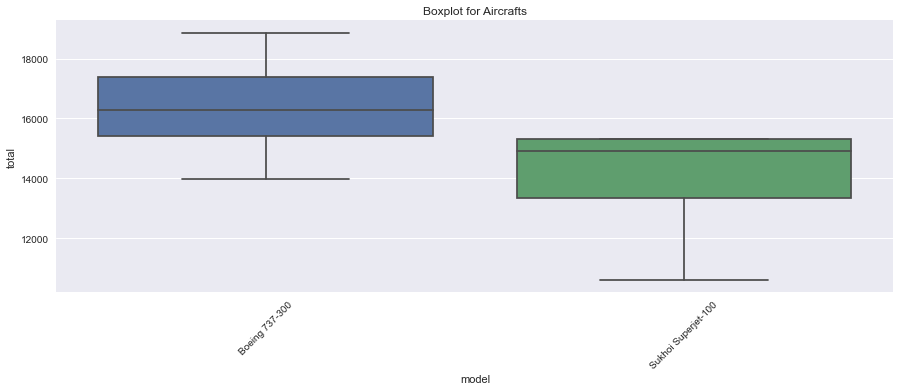

In [18]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.boxplot(x='model',
            y='total',
            data=df.loc[df.loc[:, 'model'].isin(
                df.loc[:, 'model'].value_counts().index[:])],
            ax=ax)

plt.xticks(rotation=45)
ax.set_title('Boxplot for Aircrafts')

plt.show()

As we can see Boeing makes more money tham Sukhoi

# Empty Seats Proportion

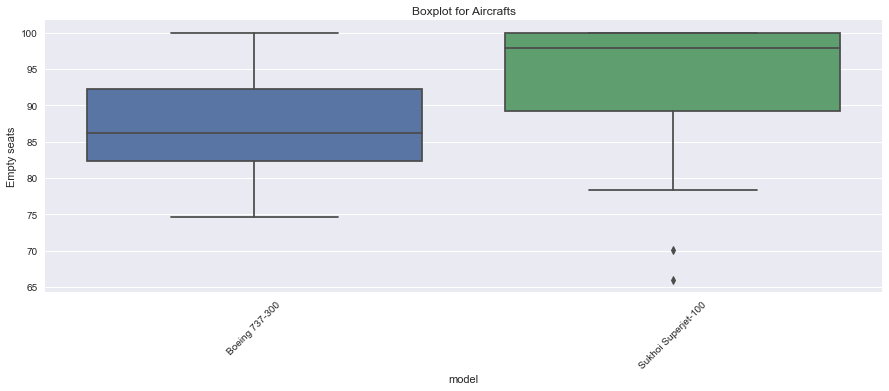

In [19]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.boxplot(x='model',
            y='Empty seats',
            data=df.loc[df.loc[:, 'model'].isin(
                df.loc[:, 'model'].value_counts().index[:])],
            ax=ax)

plt.xticks(rotation=45)
ax.set_title('Boxplot for Aircrafts')

plt.show()

In [34]:
df['fuel_consumption'] = df['model'].map(fuel_consumption)
df['fuel_price'] = df['scheduled_departure_month'].map(fuel_price)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   flight_id                  118 non-null    int64              
 1   sold_seats                 118 non-null    int64              
 2   scheduled_departure        118 non-null    datetime64[ns, UTC]
 3   scheduled_arrival          118 non-null    datetime64[ns, UTC]
 4   total_amount               118 non-null    float64            
 5   latitude                   118 non-null    float64            
 6   longitude                  118 non-null    float64            
 7   airport_code               118 non-null    object             
 8   model                      118 non-null    object             
 9   availableseats             118 non-null    int64              
 10  departure_airport          118 non-null    object             
 11  distan

In [22]:
df['Cost(Flights)'] = round(df.apply(lambda x: price(x), axis=1),2)

In [23]:
df['Profit'] = round(df['total_amount'] - df['Cost(Flights)'], 2)

In [24]:
df['Profit(min)'] = df.Profit/df['flight_time']

In [25]:
df.head(5)

,flight_id,sold_seats,scheduled_departure,scheduled_arrival,total_amount,latitude,longitude,airport_code,model,availableseats,...,distance_t,scheduled_departure_month,flight_time,Empty seats,total,fuel_consumption,fuel_price,Cost(Flights),Profit,Profit(min)
0,136119,113,2017-01-03 10:05:00+00:00,2017-01-03 11:45:00+00:00,1653000.0,55.972599,37.4146,SVO,Boeing 737-300,130,...,1220.488778,1,100.0,86.92,16530.0,2600,41435,179551.67,1473448.33,14734.4833
1,136120,109,2017-02-24 10:05:00+00:00,2017-02-24 11:45:00+00:00,1605400.0,55.972599,37.4146,SVO,Boeing 737-300,130,...,1220.488778,2,100.0,83.85,16054.0,2600,39553,171396.33,1434003.67,14340.0367
2,136122,97,2017-01-08 10:05:00+00:00,2017-01-08 11:45:00+00:00,1431000.0,55.972599,37.4146,SVO,Boeing 737-300,130,...,1220.488778,1,100.0,74.62,14310.0,2600,41435,179551.67,1251448.33,12514.4833
3,136130,107,2017-02-13 10:05:00+00:00,2017-02-13 11:45:00+00:00,1556600.0,55.972599,37.4146,SVO,Boeing 737-300,130,...,1220.488778,2,100.0,82.31,15566.0,2600,39553,171396.33,1385203.67,13852.0367
4,136131,124,2017-01-28 10:05:00+00:00,2017-01-28 11:45:00+00:00,1812800.0,55.972599,37.4146,SVO,Boeing 737-300,130,...,1220.488778,1,100.0,95.38,18128.0,2600,41435,179551.67,1633248.33,16332.4833


# Correlation between Sold tickets and Profit per min (Depending on Sold Tickets and Fuel Cost)

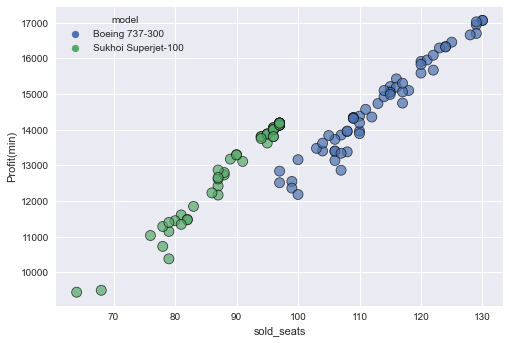

In [28]:
texts = []
x1 = df['Profit(min)']
x2 = df['sold_seats']
x3 = df['flight_id']
x4= df['scheduled_departure_month']
t = df.total_amount
x5 = df['Empty seats']
fig, ax = plt.subplots()
p1 = sns.scatterplot(x=x2,
                     y=x1,
                     data=df,
                     hue='model',
                     s=100,
                     alpha=0.7,
                     edgecolor='k')
plt.show()

# List of Flights(To Cancel )

In [29]:
df[(df.total_amount < 1460000) & (df.model == "Boeing 737-300") | (df['Empty seats'] < 75)]

,flight_id,sold_seats,scheduled_departure,scheduled_arrival,total_amount,latitude,longitude,airport_code,model,availableseats,...,distance_t,scheduled_departure_month,flight_time,Empty seats,total,fuel_consumption,fuel_price,Cost(Flights),Profit,Profit(min)
2,136122,97,2017-01-08 10:05:00+00:00,2017-01-08 11:45:00+00:00,1431000.0,55.972599,37.414600,SVO,Boeing 737-300,130,...,1220.488778,1,100.0,74.62,14310.0,2600,41435,179551.67,1251448.33,12514.4833
12,136178,99,2017-01-29 10:05:00+00:00,2017-01-29 11:45:00+00:00,1434600.0,55.972599,37.414600,SVO,Boeing 737-300,130,...,1220.488778,1,100.0,76.15,14346.0,2600,41435,179551.67,1255048.33,12550.4833
16,136204,107,2017-02-23 10:05:00+00:00,2017-02-23 11:45:00+00:00,1457800.0,55.972599,37.414600,SVO,Boeing 737-300,130,...,1220.488778,2,100.0,82.31,14578.0,2600,39553,171396.33,1286403.67,12864.0367
21,136250,99,2017-02-08 10:05:00+00:00,2017-02-08 11:45:00+00:00,1407800.0,55.972599,37.414600,SVO,Boeing 737-300,130,...,1220.488778,2,100.0,76.15,14078.0,2600,39553,171396.33,1236403.67,12364.0367
38,136360,97,2017-02-05 10:05:00+00:00,2017-02-05 11:45:00+00:00,1455400.0,55.972599,37.414600,SVO,Boeing 737-300,130,...,1220.488778,2,100.0,74.62,14554.0,2600,39553,171396.33,1284003.67,12840.0367
54,136464,100,2017-01-09 10:05:00+00:00,2017-01-09 11:45:00+00:00,1398000.0,55.972599,37.414600,SVO,Boeing 737-300,130,...,1220.488778,1,100.0,76.92,13980.0,2600,41435,179551.67,1218448.33,12184.4833
68,136642,64,2017-01-30 09:25:00+00:00,2017-01-30 10:15:00+00:00,531000.0,50.643799,36.590099,EGO,Sukhoi Superjet-100,97,...,630.309277,1,50.0,65.98,10620.0,1700,41435,58699.58,472300.42,9446.0084
93,136807,68,2017-02-23 09:25:00+00:00,2017-02-23 10:15:00+00:00,531000.0,50.643799,36.590099,EGO,Sukhoi Superjet-100,97,...,630.309277,2,50.0,70.10,10620.0,1700,39553,56033.42,474966.58,9499.3316


In [32]:
df['Profit'].sum()

125073878.25

In [30]:
df[(df.total_amount < 1460000) & (df.model == "Boeing 737-300") |
   (df['Empty seats'] < 75)].flight_id.to_list()

[136122, 136178, 136204, 136250, 136360, 136464, 136642, 136807]